In [26]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('table.xlsx')

# Display basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

# Basic statistics for numeric columns
print("\nDescriptive Statistics:\n", df.describe())

Shape: (2065, 34)

Columns: ['Imei', 'Dttime', 'Altitude', 'An1', 'An2', 'An3', 'An4', 'Angle', 'Din1', 'Dooropen', 'Din2', 'Ignistat', 'Din3', 'Din4', 'Entrydt', 'Extbat', 'Extbatlevel', 'Extra1', 'Extra2', 'Intbat', 'Intbatlevel', 'Issensor', 'Latitude', 'Longitude', 'Odo', 'Odometer', 'Port', 'Satelites', 'Sequence_number', 'Speed', 'Isstop', 'Miscmap', 'Dttime_ist', 'Action']

Data Types:
 Imei                 int64
Dttime              object
Altitude             int64
An1                  int64
An2                  int64
An3                  int64
An4                  int64
Angle                int64
Din1                 int64
Dooropen             int64
Din2                 int64
Ignistat             int64
Din3                 int64
Din4                 int64
Entrydt             object
Extbat               int64
Extbatlevel          int64
Extra1             float64
Extra2             float64
Intbat               int64
Intbatlevel          int64
Issensor           float64
Latitude 

In [27]:
df.head()

,Imei,Dttime,Altitude,An1,An2,An3,An4,Angle,Din1,Dooropen,...,Odo,Odometer,Port,Satelites,Sequence_number,Speed,Isstop,Miscmap,Dttime_ist,Action
0,350544508026823,2025-04-02T10:03:22,38,895,0,0,0,111,0,0,...,0,70759196,0,17,0,0,0,"{14=9994584414, 16=70759196, 179=0, 181=11, 18...",2025-04-02T15:33:22,Delete
1,350544508026823,2025-04-02T10:08:22,38,904,0,0,0,111,0,0,...,0,70759196,0,19,0,0,0,"{14=9994584414, 16=70759196, 179=0, 181=8, 182...",2025-04-02T15:38:22,Delete
2,350544508026823,2025-04-02T10:13:23,25,893,0,0,0,111,0,0,...,0,70759196,0,19,0,0,0,"{14=9994584414, 16=70759196, 179=0, 181=10, 18...",2025-04-02T15:43:23,Delete
3,350544508026823,2025-04-02T10:18:23,25,879,0,0,0,111,0,0,...,0,70759196,0,18,0,0,0,"{14=9994584414, 16=70759196, 179=0, 181=11, 18...",2025-04-02T15:48:23,Delete
4,350544508026823,2025-04-02T10:23:23,25,865,0,0,0,111,0,0,...,0,70759196,0,18,0,0,0,"{14=9994584414, 16=70759196, 179=0, 181=9, 182...",2025-04-02T15:53:23,Delete


In [28]:
def calculate_fuel(voltage):
    voltage_min, fuel_min = 173, 0
    voltage_max, fuel_max = 5062, 375
    fuel = ((voltage - voltage_min) / (voltage_max - voltage_min)) * fuel_max
    return max(min(fuel, fuel_max), fuel_min)


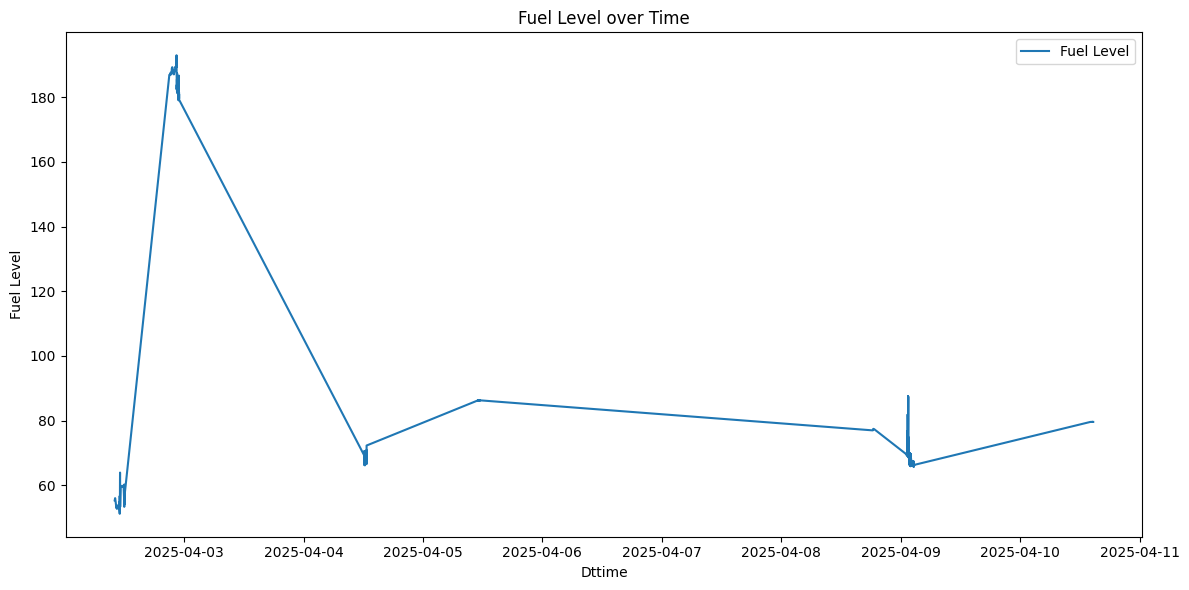

In [31]:
# Generate the 'fuel' column using the calculate_fuel function
df['fuel'] = df['An1'].apply(calculate_fuel)

# Plot the time series of fuel vs Dttime
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Dttime'], df['fuel'], label='Fuel Level')
plt.xlabel('Dttime')
plt.ylabel('Fuel Level')
plt.title('Fuel Level over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# Convert 'Dttime' to pandas datetime using mixed format to handle inconsistent strings
df['Dttime'] = pd.to_datetime(df['Dttime'], format='mixed', errors='coerce')

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Imei             2065 non-null   int64         
 1   Dttime           2065 non-null   datetime64[ns]
 2   Altitude         2065 non-null   int64         
 3   An1              2065 non-null   int64         
 4   An2              2065 non-null   int64         
 5   An3              2065 non-null   int64         
 6   An4              2065 non-null   int64         
 7   Angle            2065 non-null   int64         
 8   Din1             2065 non-null   int64         
 9   Dooropen         2065 non-null   int64         
 10  Din2             2065 non-null   int64         
 11  Ignistat         2065 non-null   int64         
 12  Din3             2065 non-null   int64         
 13  Din4             2065 non-null   int64         
 14  Entrydt          2065 non-null   object 